## Data cleaning and feature engineering

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("clean_csv", index_col=0)
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,MONTHLY_MINUTES_OF_USE,...,STREAMINGMOVIES_No,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Bank transfer automatic,PAYMENTMETHOD_Credit card automatic,PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,10,0,0,29.75,301.90,0,...,1,0,0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,1,39.65,39.65,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,1,0,0,30.20,30.20,0,...,1,0,0,1,0,0,0,0,1,0


In [3]:
#df.isnull().sum()

In [4]:
#df.info()

In [5]:
#Prepare target & features for modeling
cols = df.columns
train_cols = cols.drop(["CHURN"])
features = df[train_cols]
target = df["CHURN"]
train_cols

Index(['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'PAPERLESSBILLING', 'MONTHLYCHARGES', 'TOTALCHARGES',
       'MONTHLY_MINUTES_OF_USE', 'TOTAL_MINUTES_OF_USE', 'MONTHLY_SMS',
       'TOTAL_SMS', 'MULTIPLELINES_No', 'MULTIPLELINES_No phone service',
       'MULTIPLELINES_Yes', 'INTERNETSERVICE_DSL',
       'INTERNETSERVICE_Fiber optic', 'INTERNETSERVICE_No',
       'ONLINESECURITY_No', 'ONLINESECURITY_No internet service',
       'ONLINESECURITY_Yes', 'ONLINEBACKUP_No',
       'ONLINEBACKUP_No internet service', 'ONLINEBACKUP_Yes',
       'DEVICEPROTECTION_No', 'DEVICEPROTECTION_No internet service',
       'DEVICEPROTECTION_Yes', 'TECHSUPPORT_No',
       'TECHSUPPORT_No internet service', 'TECHSUPPORT_Yes', 'STREAMINGTV_No',
       'STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No', 'STREAMINGMOVIES_No internet service',
       'STREAMINGMOVIES_Yes', 'CONTRACT_Month-to-month', 'CONTRACT_One year',
       'CONTRAC

## KNN

In [6]:
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
X = features
y = target
#y = y.reshape(-1, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
#X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))
X_scaler = StandardScaler().fit(X_train)

In [10]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.710
k: 3, Train/Test Score: 0.857/0.742
k: 5, Train/Test Score: 0.832/0.747
k: 7, Train/Test Score: 0.822/0.759
k: 9, Train/Test Score: 0.821/0.765
k: 11, Train/Test Score: 0.820/0.771
k: 13, Train/Test Score: 0.811/0.773
k: 15, Train/Test Score: 0.807/0.780
k: 17, Train/Test Score: 0.808/0.774
k: 19, Train/Test Score: 0.805/0.773


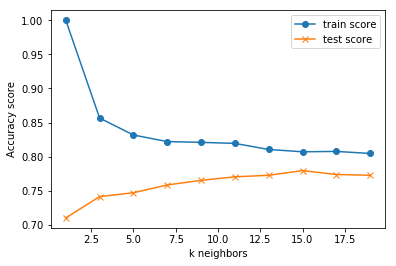

In [13]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o', label="train score")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="test score")
plt.xlabel("k neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.savefig("knn_figure")

In [18]:
# Note that k: 15 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=15 Train Score: %.3f' % knn.score(X_train, y_train))
print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

k=15 Train Score: 0.790
k=15 Test Acc: 0.755


In [19]:
#new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
predictions = knn.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
First 10 Actual labels: [1, 0, 0, 1, 0, 0, 1, 0, 1, 1]


In [20]:
# False positives.
fp_filter = (predictions == 1) & (y_test == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (y_test == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (y_test == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (y_test == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)

from sklearn.metrics import roc_curve, auc, roc_auc_score
auc = roc_auc_score(y_test, predictions)
print(f"auc: {auc}")
# Calculate classification report
target_names=['1','0']
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

0.26552462526766596
0.0687789799072643
auc: 0.5983728226802008
             precision    recall  f1-score   support

          1       0.78      0.93      0.85      1294
          0       0.58      0.27      0.36       467

avg / total       0.73      0.75      0.72      1761

